#  Introducción a PyGame

Pygame es una liberia que nos permite hacer videojeugos principalmente en 2 dimensiones, como lo son los juegos de plataformas.

Para empezar a usar pygame en nuestros proyectos tendremos que instalarlo en __nuestro entorno virutal__, para hacer esto tendremos que ejecutar el siguiente comando:

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pygame



ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "/home/nasa/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "/home/nasa/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/nasa/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "/home/nasa/anaconda3/lib/python3.7/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/nasa/anaconda3/lib/pyth

** Se hace de esta manera porque estamos en un Jupyter notebook

In [5]:
# Esta es la forma como se ejecutaría en un proyecto
## Tienen que estar en la carpeta de su proyecto!

# pip install pygame

Lo primero que haremos será importar la libreria en el modulo (archivo) que estemos trabajando

In [3]:
import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Lo primero que necesita nuestro juego es una ventana, para hacer esto tenemos que:

In [4]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500,500))# definimos el tamaño de pixeles de nuestra pantalla
pygame.display.set_caption("hola mundo!")# de esta manera definimos el titulo de nuestra pantalla

Nos produce un error porque no sabe cuando cerrarse

In [3]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500,500))
pygame.display.set_caption("hola mundo!")

run = True 
while run : # Decimos que mientras corriendo sea verdadero
    for event in pygame.event.get(): # Dentro de este for definireos todos nuestros eventos 
        if event.type == pygame.QUIT: # Si un click es en la 'x', entonces ya no se va a correr
            run = False
            
pygame.quit() # Se cierra pygame

## Dibujar en pantalla!
Nuestro proposito ahora va a ser el de dibujar una caja y moverla con el teclado, para esto necesitamos comprender lo siguiente.

### Figuras basicas
Pygame tiene el modulo *pygame.draw* que nos sirve para dibujar figuras comunes, como rectangulos, circulos, lineas, etc..., todas las figuras comparten los paramatros de : 
* surface
* color

Sin embargo cada figura tiene unos parametros especificos, [haz click para saber mas.](https://www.pygame.org/docs/ref/draw.html)

#### Dibujar una caja
la función *pygame.draw.rect()* nos permite hacerlo. Los parametros que recibe son :
* surface : la superficie en la cual se dibuja
* color : puede ser un color, un entero o una tupla (RGB)
* rect : la posición y dimensiones del rectangulo
* width : grosor de la linea de dibujo

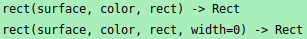



In [2]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500,500))
pygame.display.set_caption("mi cajita xd!")

pos_x = 50
pos_y = 50
ancho = 50
alto = 50
color = (255,0,0)

run = True 
while run : # Decimos que mientras corriendo sea verdadero
    for event in pygame.event.get(): # Dentro de este for definireos todos nuestros eventos 
        if event.type == pygame.QUIT: # Si un click es en la 'x', entonces ya no se va a correr
            run = False

    pygame.draw.rect(ventana,color,(pos_x, pos_y, ancho, alto))
    pygame.display.update()
pygame.quit() # Se cierra pygame

## Que es un evento?
Los eventos en los videojuegos son las situaciones que permiten que podamos interctuar con nuestro juego, nos sirven para decir que va a ocurrir cuando oprimimos una tecla, pero tambien nos pueden servir para definir como interactuamos con nuestro entorno.

### Eventos en Pygame
El modulo *pygame.event* maneja los eventos como colas, el manejo de estas colas depende mucho del modulo *pygame.display*, si la pantalla no se ha inicializado, tiende a fallar el manejo de eventos.

Los eventos mas comunes son : 
![imagen.png](attachment:imagen.png)

Por el momento solo nos va a interesar la rutina *pygame.event.get()*. [Más información sobre los eventos dentro de pygame](https://www.pygame.org/docs/ref/event.html) 

In [17]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500,500))
pygame.display.set_caption("mi cajita xd!")

pos_x = 50
pos_y = 50
ancho = 50
alto = 50
color = (255,0,0)

# para mover la caja vamos a crear el valor de "velocidad"
velocidad = 5

run = True 
while run : # Decimos que mientras corriendo sea verdadero
    
    # reloj de nuestro juego
    pygame.time.delay(100) # hace una pausa entre cada for de 100 ms
    
    for event in pygame.event.get(): # Dentro de este for definireos todos nuestros eventos 
        if event.type == pygame.QUIT: # Si un click es en la 'x', entonces ya no se va a correr
            run = False

    key = pygame.key.get_pressed()
        
    if key[pygame.K_LEFT]:
        pos_x -= velocidad
    if key[pygame.K_RIGHT]:
        pos_x += velocidad
    if key[pygame.K_UP]:
        pos_y -= velocidad
    if key[pygame.K_DOWN]:
        pos_y += velocidad
    
    ventana.fill((0, 100, 0)) # llenamos la pantalla con un color para que no se vea el rectangulo regado
    pygame.draw.rect(ventana,color,(pos_x, pos_y, ancho, alto))
    
    pygame.display.update()
pygame.quit() # Se cierra pygame

# Converisión a objetos
Vamos a pasar nuestro código al paradigma POO, esto nos servirá para ahorrarnos una buena cantidad de lineas de código a la larga, y para entender nuestro juego de una manera mas intuitiva.

In [2]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500, 500))
pygame.display.set_caption("mi cajita xd!")


class cajita_xd:
    def __init__(self):
        self.i = 0
        self.pos_x = 50
        self.pos_y = 50
        self.ancho = 50
        self.alto = 50
        self.color = (255, 0, 0)
        self.velocidad = 5

    def mover_der(self):
        self.pos_x += self.velocidad

    def mover_izq(self):
        self.pos_x -= self.velocidad

    def mover_arriba(self):
        self.pos_y -= self.velocidad

    def mover_abajo(self):
        self.pos_y += self.velocidad

    def dibujar(self):
        pygame.draw.rect(ventana, self.color, (self.pos_x,
                                               self.pos_y,
                                               self.ancho,
                                               self.alto))


caja = cajita_xd()
run = True
while run:  # Decimos que mientras corriendo sea verdadero

    # reloj de nuestro juego
    pygame.time.delay(30)  # hace una pausa entre cada for de 100 ms

    for event in pygame.event.get():  # Dentro de este for definireos todos nuestros eventos
        if event.type == pygame.QUIT:  # Si un click es en la 'x', entonces ya no se va a correr
            run = False

    key = pygame.key.get_pressed()
    # Decimos que se puede mover si se oprime x tecla y no supera los margenes de la pantalla
    if key[pygame.K_LEFT]:
        caja.mover_izq()
    if key[pygame.K_RIGHT]:
        caja.mover_der()
    if key[pygame.K_UP]:
        caja.mover_arriba()
    if key[pygame.K_DOWN]:
        caja.mover_abajo()

    # llenamos la pantalla con un color para que no se vea el rectangulo regado
    ventana.fill((0, 100, 0)) 
    # llenamos primero la pantalla y luego pintamos el cuadrado para poder verlo
    caja.dibujar()


    pygame.display.update()
pygame.quit()  # Se cierra pygame


# Colisiones
En todo juego, las colisiones son una parte fundamental, en pygame se manejan las colisiones se manejan de dos formas

* Se dice que si se pasa de cierta coordenada pasa algo
* Se dice que dos objetos colisionan

Aunque parezca que la primera forma es una tontería, es la forma mas sencilla de simular una colisión, es muy util si los objetos son estaticos.

## Cajas de colisión (hitboxes)
Es la segunda forma de implementar la colisiones. Seguramente te has preguntado porque a veces cuando juegas algún juego de disparos, mueres cuando claramente no te han dado, esto es debido a la hitbox.

Una caja de colisión es, como su nombre lo indica, una caja que cuando colisiona con algo, responde de cierta manera.

el metodo __.colliderect(rectangulo_x)__ nos permite identificar las colisiones, su implementación general es:


In [ ]:
rectangulo_1 = pygame.Rect(x, y, ancho, alto)
rectangulo_2 = pygame.Rect(x2, y2, ancho2, alto2)

if(rectangulo_1.colliderec(rectangulo_2)):
    print("colisión")

Para saber más sobre las funciones de _pygame.Rect()_ haz click [aquí](https://www.pygame.org/docs/ref/rect.html).
Ahora vamos a implementar un metodo que nos devuelva el rectangulo asociado a nuestra cajita_xd, y vamos a hacerlo colisionar
con otro rectangulo.

In [3]:
import pygame
pygame.init()
ventana = pygame.display.set_mode((500, 500))
pygame.display.set_caption("mi cajita xd!")


class cajita_xd:
    def __init__(self):
        self.i = 0
        self.pos_x = 50
        self.pos_y = 50
        self.ancho = 50
        self.alto = 50
        self.color = (255, 0, 0)
        self.velocidad = 5
        self.hitbox = (self.pos_x + 10, self.pos_y + 10, 70, 70)

    def mover_der(self):
        self.pos_x += self.velocidad

    def mover_izq(self):
        self.pos_x -= self.velocidad

    def mover_arriba(self):
        self.pos_y -= self.velocidad

    def mover_abajo(self):
        self.pos_y += self.velocidad

    def dibujar(self):
        pygame.draw.rect(ventana, self.color, (self.pos_x,
                                               self.pos_y,
                                               self.ancho,
                                               self.alto))
    # Metodo que devuelve un rectangulo que no se ve, sirve para 
    # implmentar el metodo que nos permite saber si hubo una colsión
    def get_rect(self):
        return pygame.Rect(self.pos_x, self.pos_y, self.ancho, self.alto)


i = 0
caja = cajita_xd()
run = True
while run:  # Decimos que mientras corriendo sea verdadero

    # reloj de nuestro juego
    pygame.time.delay(30)  # hace una pausa entre cada for de 100 ms

    for event in pygame.event.get():  # Dentro de este for definireos todos nuestros eventos
        if event.type == pygame.QUIT:  # Si un click es en la 'x', entonces ya no se va a correr
            run = False

    key = pygame.key.get_pressed()
    # Decimos que se puede mover si se oprime x tecla y no supera los margenes de la pantalla
    if key[pygame.K_LEFT] and caja.pos_x > 0:
        caja.mover_izq()
    if key[pygame.K_RIGHT] and caja.pos_x < 450:
        caja.mover_der()
    if key[pygame.K_UP] and caja.pos_y > 0:
        caja.mover_arriba()
    if key[pygame.K_DOWN] and caja.pos_y < 450:
        caja.mover_abajo()

    # llenamos la pantalla con un color para que no se vea el rectangulo regado
    ventana.fill((0, 100, 0))
    caja.dibujar()
    pygame.draw.rect(ventana, (255, 0, 0), (80, 80, 50, 50))
    rectangulo = pygame.Rect(80, 80, 50, 50)

    if(caja.get_rect().colliderect(rectangulo)):
        print(i)
        i += 1
    pygame.display.update()
pygame.quit()  # Se cierra pygame



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


# Imágenes


### Fuentes
* https://www.youtube.com/watch?v=i6xMBig-pP4
